In [41]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs, feature
import glob
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.gridspec import SubplotSpec
from __future__ import unicode_literals
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.io import shapereader
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

In [83]:
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
bounds = [-3.4, 1.15, 4.5, 11.5]
def set_fig_params(axes):
    for i,j in enumerate(axes):
    # for i in (range(0,len(axes))):
        axes[i].set_extent(bounds)
        axes[i].add_feature(feature.COASTLINE)
        axes[i].add_feature(feature.BORDERS)
        axes[i].add_feature(feature.STATES, linewidth = 0.2)
        axes[i].set_xticks([-3,-1,1.2], crs=crs.PlateCarree())
        axes[i].set_yticks([11,10,9,8,7,6], crs=crs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        axes[i].xaxis.set_major_formatter(lon_formatter)
        axes[i].yaxis.set_major_formatter(lat_formatter)
        
def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    row = fig.add_subplot(grid)
    row.set_title(f'{title}\n', fontweight='semibold')#) if row==1 else row.set_title(f'{title}')
    # if row==0 row.set_title(f'{title}\n\n\n', fontweight='semibold') else row.set_title(f'{title}\n'
    row.set_frame_on(False)
    row.axis('off')

In [3]:
path1 = '/media/kenz/1B8D1A637BBA134B/Data/calculated/'

In [4]:
#### Load data
mt_mpi = glob.glob(path1+'trans_MPI-M-MPI-ESM-LR_rcp*_GERICS-REMO2015_*.nc')
mt_nor = glob.glob(path1+'trans_NCC-NorESM1-M_rcp*_GERICS-REMO2015_*.nc')

In [5]:
mt_mpi

['/media/kenz/1B8D1A637BBA134B/Data/calculated/trans_MPI-M-MPI-ESM-LR_rcp26_GERICS-REMO2015_1991_2020.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/trans_MPI-M-MPI-ESM-LR_rcp26_GERICS-REMO2015_2031_2060.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/trans_MPI-M-MPI-ESM-LR_rcp26_GERICS-REMO2015_2061_2090.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/trans_MPI-M-MPI-ESM-LR_rcp85_GERICS-REMO2015_1991_2020.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/trans_MPI-M-MPI-ESM-LR_rcp85_GERICS-REMO2015_2031_2060.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/trans_MPI-M-MPI-ESM-LR_rcp85_GERICS-REMO2015_2061_2090.nc']

In [10]:
vec = xr.open_dataset(path1+'VECTRI_GHA-22_NCC-NorESM1-M_rcp26_r1RICS-REMO2015.nc')

In [7]:
vectri = glob.glob(path1+'VECTRI_GHA-22*.nc')

/tmp/ipykernel_14143/3259719976.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


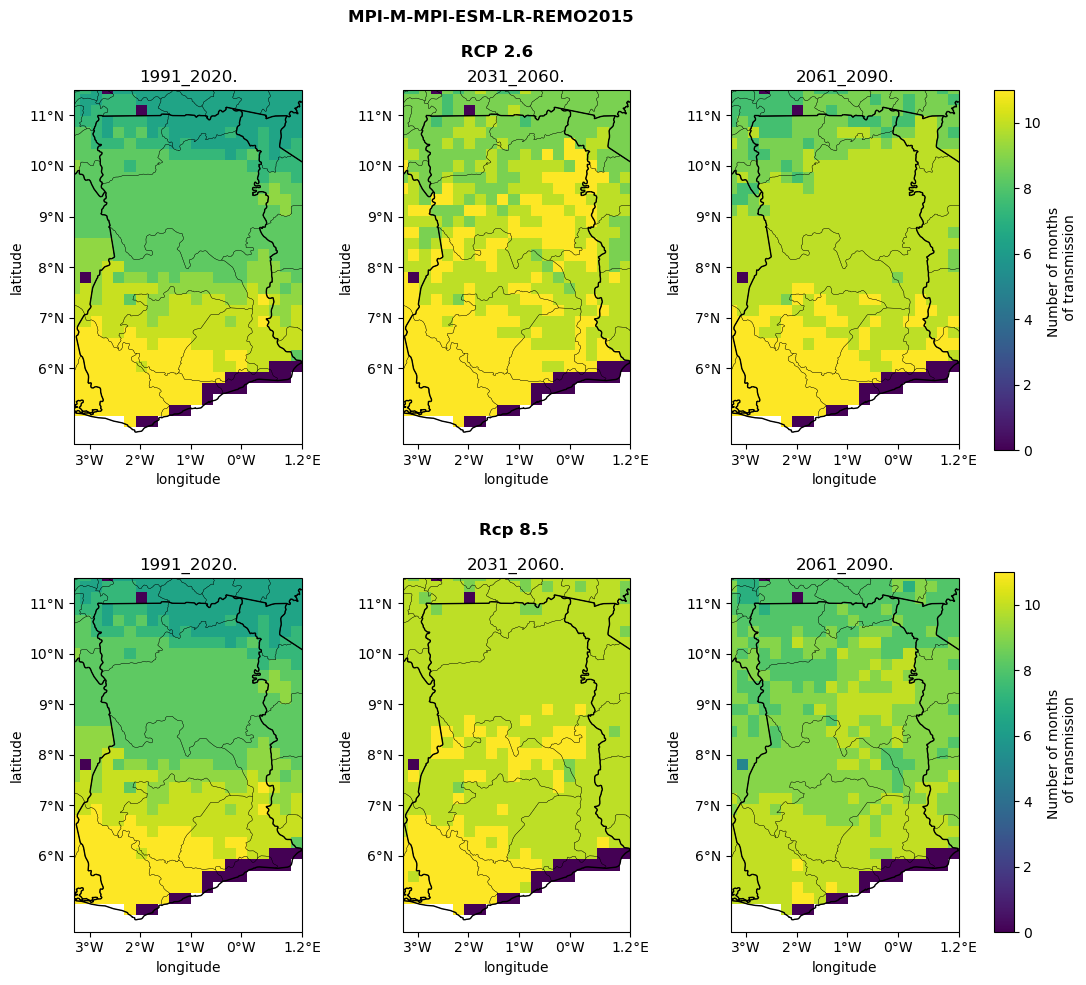

In [6]:
fig, ax = plt.subplots(2,3, figsize = (10,10),subplot_kw={'projection':crs.PlateCarree()})
ax = ax.flatten()
for i, j in enumerate(mt_mpi):
    cb = xr.open_dataset(j).eir.plot(ax = ax[i], add_colorbar = False)
    ax[i].set_title(j[-12:-2])
set_fig_params(ax)
grid = plt.GridSpec(2, 3)
create_subtitle(fig, grid[1, ::], 'Rcp 8.5 \n')
for i in [0.54,0.058]:
    cax = fig.add_axes([1,i,0.02, 0.36])
    fig.colorbar(cb, cax=cax, orientation='vertical', label='Number of months \n of transmission')
plt.suptitle('MPI-M-MPI-ESM-LR-REMO2015'+' \n \n RCP 2.6', fontweight = 'bold')
plt.tight_layout()

/tmp/ipykernel_14143/1251512739.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


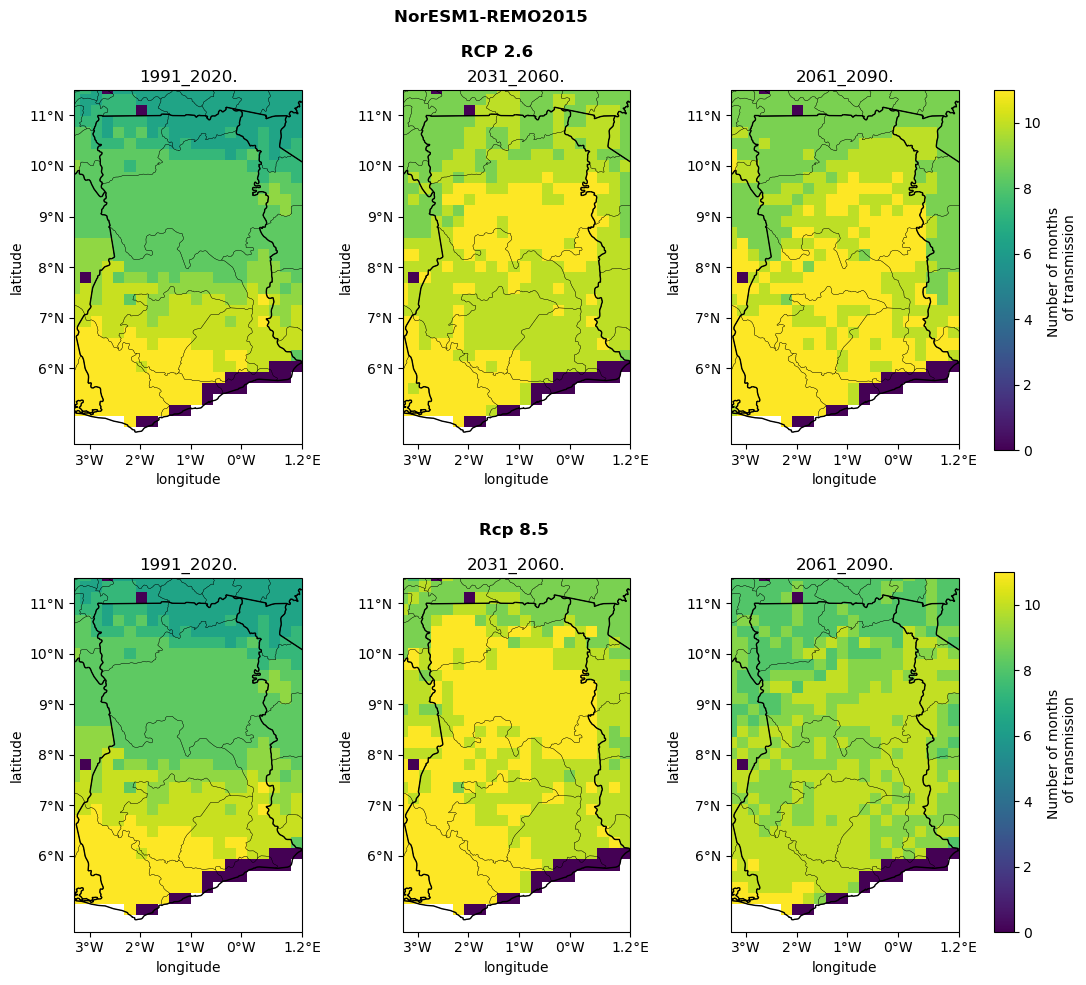

In [7]:
fig, ax = plt.subplots(2,3, figsize = (10,10),subplot_kw={'projection':crs.PlateCarree()})
ax = ax.flatten()
for i, j in enumerate(mt_nor):
    cb = xr.open_dataset(j).eir.plot(ax = ax[i], add_colorbar = False)
    ax[i].set_title(j[-12:-2])
set_fig_params(ax)
grid = plt.GridSpec(2, 3)
create_subtitle(fig, grid[1, ::], 'Rcp 8.5 \n')
for i in [0.54,0.058]:
    cax = fig.add_axes([1,i,0.02, 0.36])
    fig.colorbar(cb, cax=cax, orientation='vertical', label='Number of months \n of transmission')
plt.suptitle('NorESM1-REMO2015'+' \n \n RCP 2.6', fontweight = 'bold')
plt.tight_layout()

/tmp/ipykernel_3499/3636950952.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


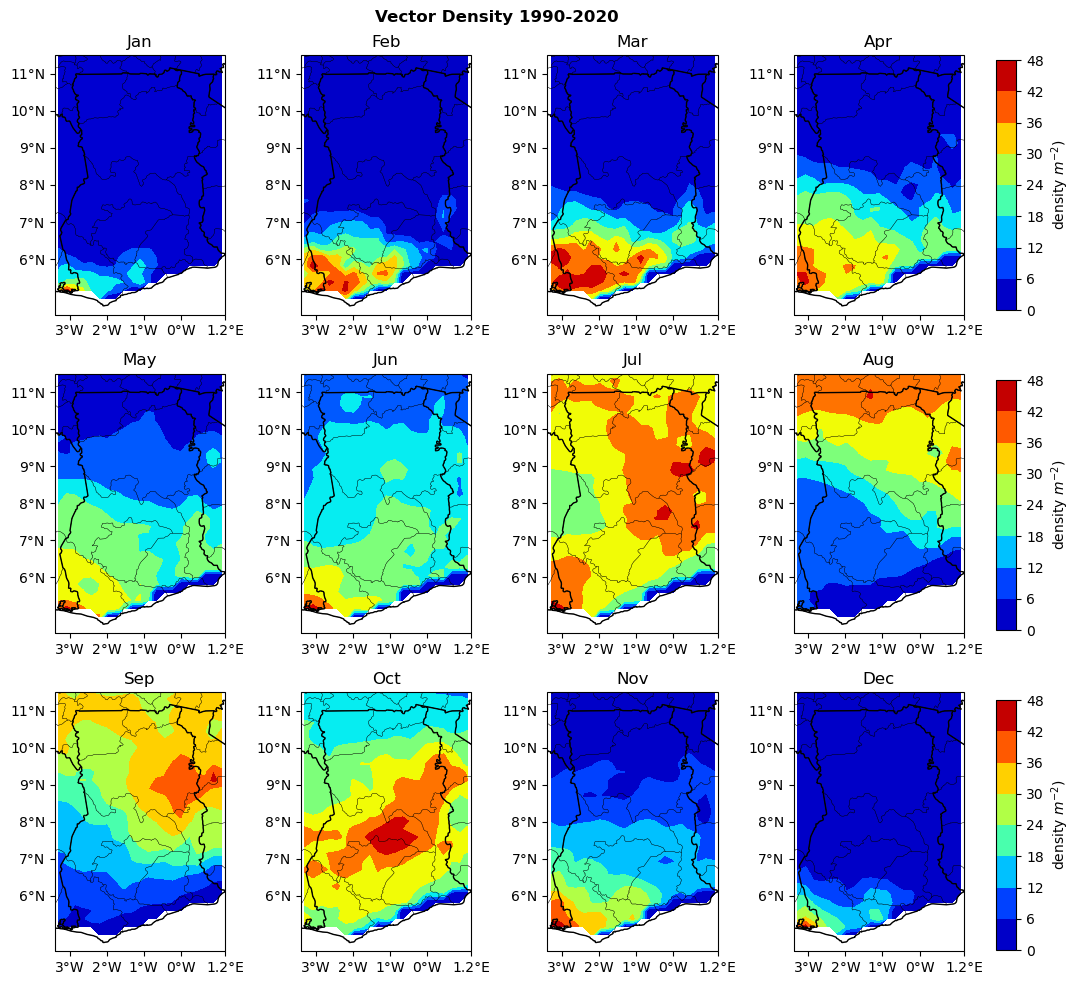

In [50]:
titles = ['Jan', 'Feb','Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
vec_m = vec.vector.sel(time = slice('1981','2021')).groupby('time.month').mean('time')*1000
fig, axes = plt.subplots(ncols = 4, nrows = 3, figsize=(10,10), subplot_kw={'projection':crs.PlateCarree()})
ax = axes.flatten()
for i in range(0,12):
    cb=ax[i].contourf(vec_m.longitude, vec_m.latitude, vec_m[i], cmap='jet', transform=crs.PlateCarree())
    ax[i].set_title(titles[i])
set_fig_params(ax)
for i in [0.68,0.36, 0.04]:
    cax = fig.add_axes([1,i,0.02, 0.25])
    fig.colorbar(cb, cax=cax, orientation='vertical', label='density $m^{-2}$)')
plt.suptitle('Vector Density 1990-2020',fontweight = 'bold')
plt.tight_layout()

In [ ]:
dt = vec.eir.sel(time =slice('2031','2060'))#.resample(time = 'M').sum('time')#.groupby('time.month').mean('time').max()
dt# = dt.groupby('time.month').mean('time')


In [ ]:
# dt.where(dt.time.dt.month == 2)
 

In [32]:
ds = xr.open_dataset(vectri[0]).eir.sel(time =slice('1990','2020')).resample(time = 'M').sum('time').groupby('time.month').mean('time')
# ds.resample(time='M').sum('time').groupby('time.month').mean('time').max()

In [34]:
ds.max()

<xarray.DataArray 'eir' ()>
array(38.71311188)

In [12]:
vectri

['/media/kenz/1B8D1A637BBA134B/Data/calculated/VECTRI_GHA-22_MPI-M-MPI-ESM-LR_rcp26_GERICS-REMO2015.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/VECTRI_GHA-22_MPI-M-MPI-ESM-LR_rcp85_GERICS-REMO2015.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/VECTRI_GHA-22_NCC-NorESM1-M_rcp26_r1RICS-REMO2015.nc',
 '/media/kenz/1B8D1A637BBA134B/Data/calculated/VECTRI_GHA-22_NCC-NorESM1-M_rcp85_r1RICS-REMO2015.nc']

In [101]:
titles = ['Jan', 'Feb','Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
def _plt_(var):
    for i, j in enumerate(vectri):
        tta = ['1991','2031', '2061']
        ttb = ['2020','2060', '2090']
        for x in range(0,3):
            # data = xr.open_dataset(j)[var].sel(time = slice(tta[x],ttb[x])).groupby('time.month').mean('time')
            if var=='eir':
                data = xr.open_dataset(j)[var].sel(time = slice(tta[x],ttb[x])).resample(time = 'M').sum('time').groupby('time.month').mean('time')
            else:
                data = xr.open_dataset(j)[var].sel(time = slice(tta[x],ttb[x]))*1000
                data = data.resample(time ='M').sum('time').groupby('time.month').mean('time')
            # print(data.max())
            fig, axes = plt.subplots(ncols = 4, nrows = 3, figsize=(10,10), subplot_kw={'projection':crs.PlateCarree()})
            ax = axes.flatten()
            set_fig_params(ax)
            for z in range(0,12):
                levels = np.linspace(int(data.min()),int(data.max()),8)
                cb = ax[z].contourf(data.longitude, data.latitude, data[z], levels = levels, cmap='jet', transform=crs.PlateCarree(), extend='both')
                ax[z].set_title(titles[z])
                
            for i in [0.65,0.345, 0.04]:
                cax = fig.add_axes([1,i,0.02, 0.25])
                fig.colorbar(cb, cax=cax, orientation='vertical', label= f'{var}')#+' $m^{-2}$)')
            plt.suptitle(f'{var.upper()} \n \n'+j[-41:-18]+tta[x]+'-'+ttb[x],fontweight = 'bold')
            plt.tight_layout()
            plt.savefig(path1+'figures/'+f'{var}'+'_'+j[-41:-18]+tta[x]+'-'+ttb[x]+'.jpeg', bbox_inches='tight')

/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(

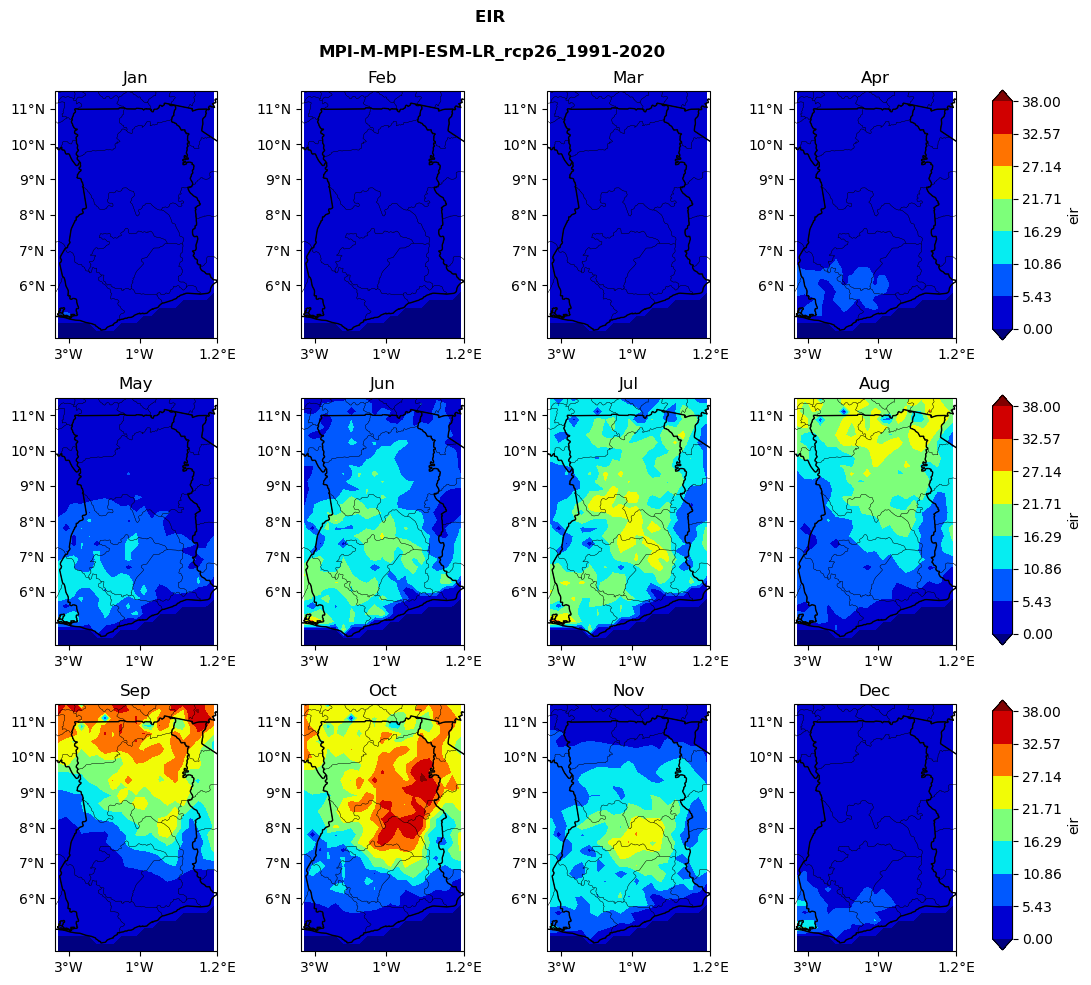

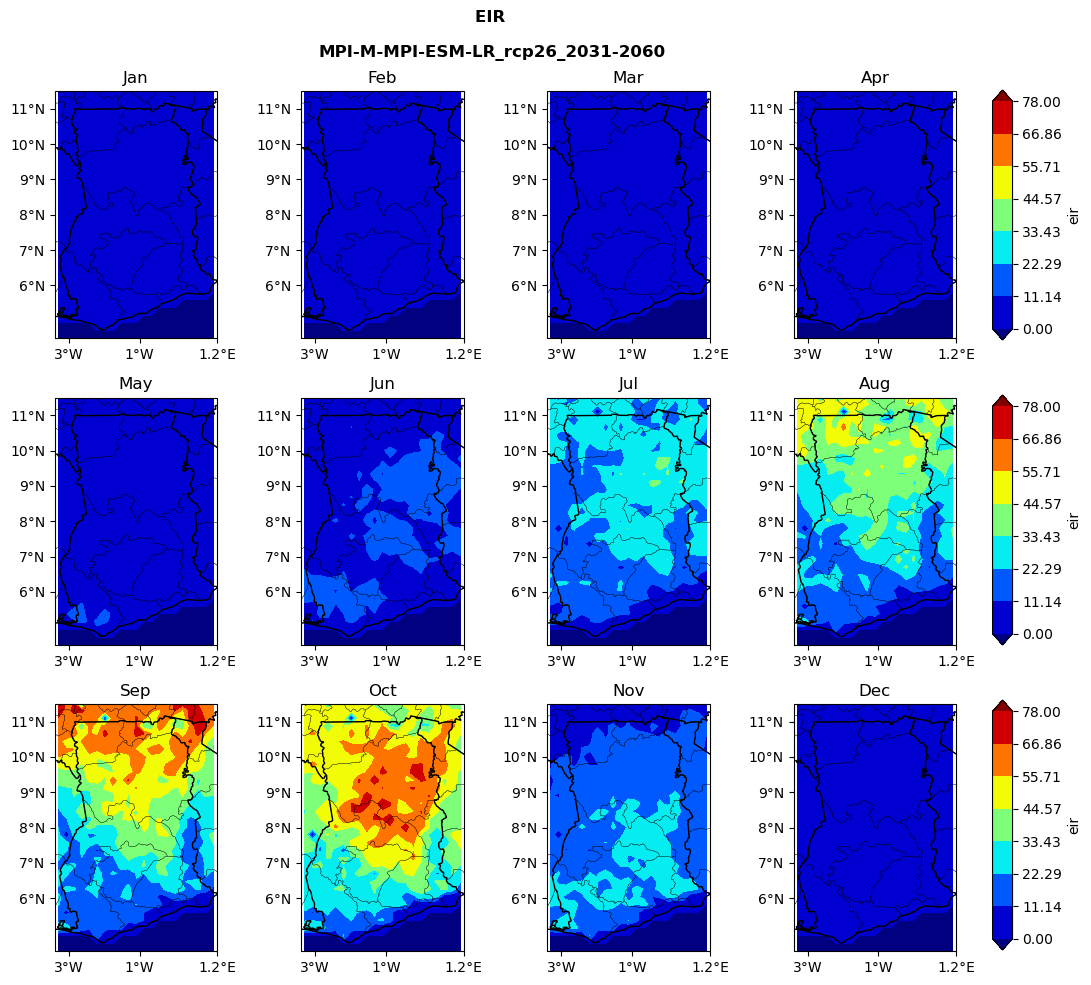

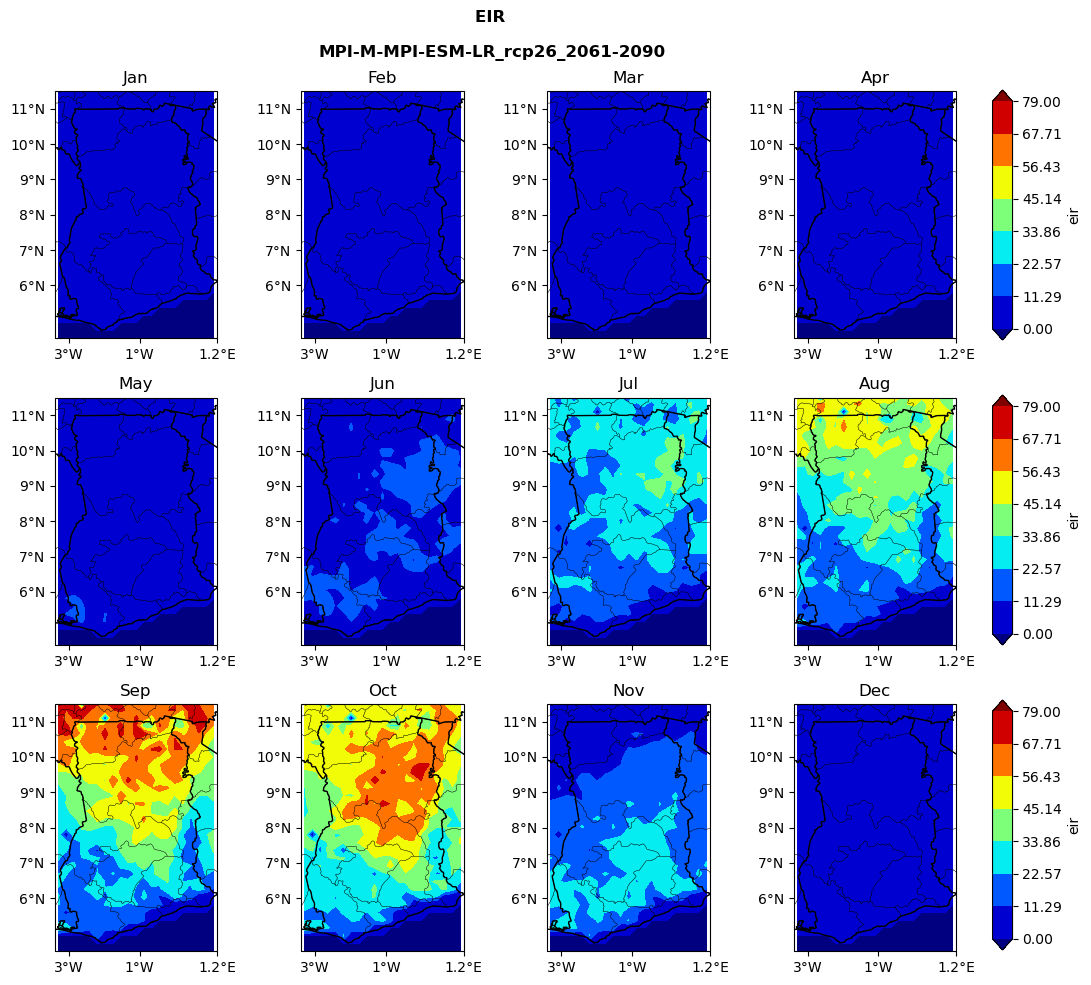

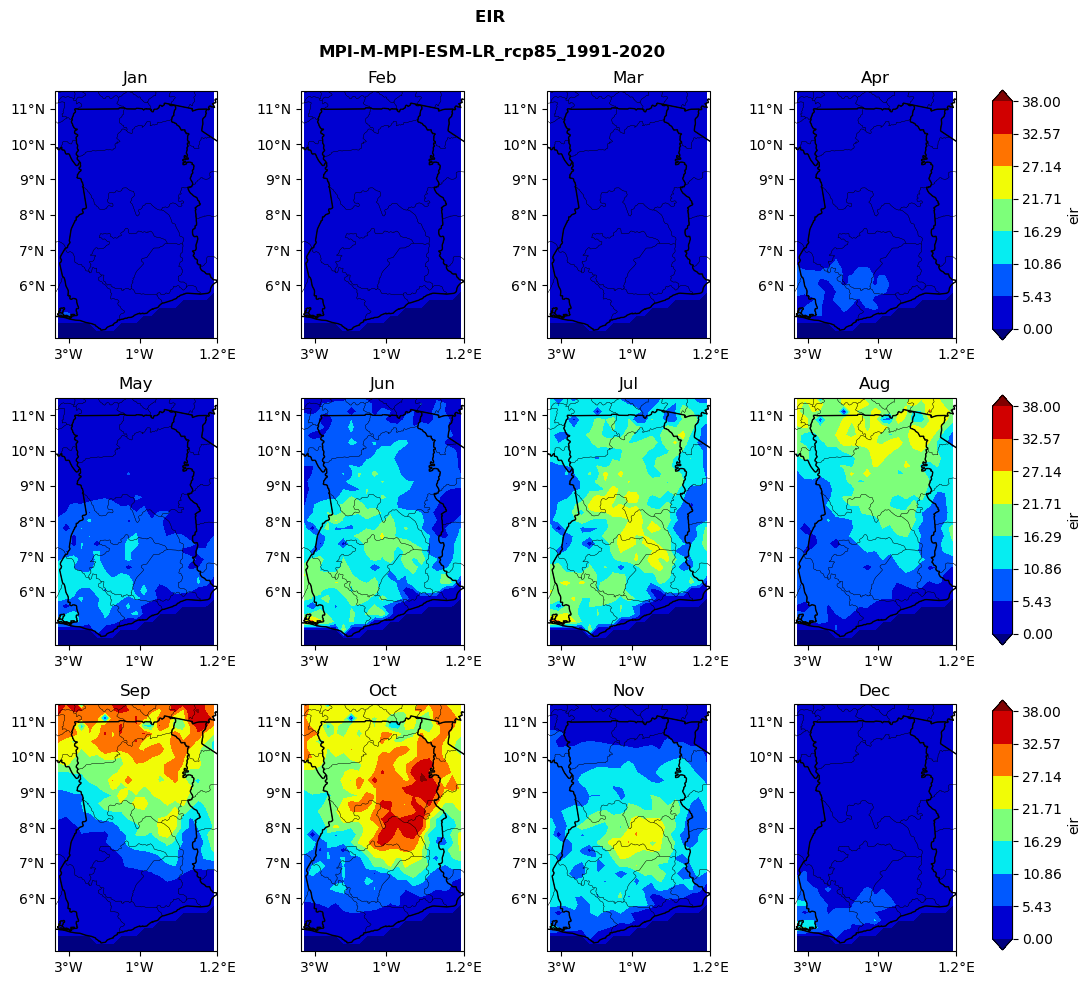

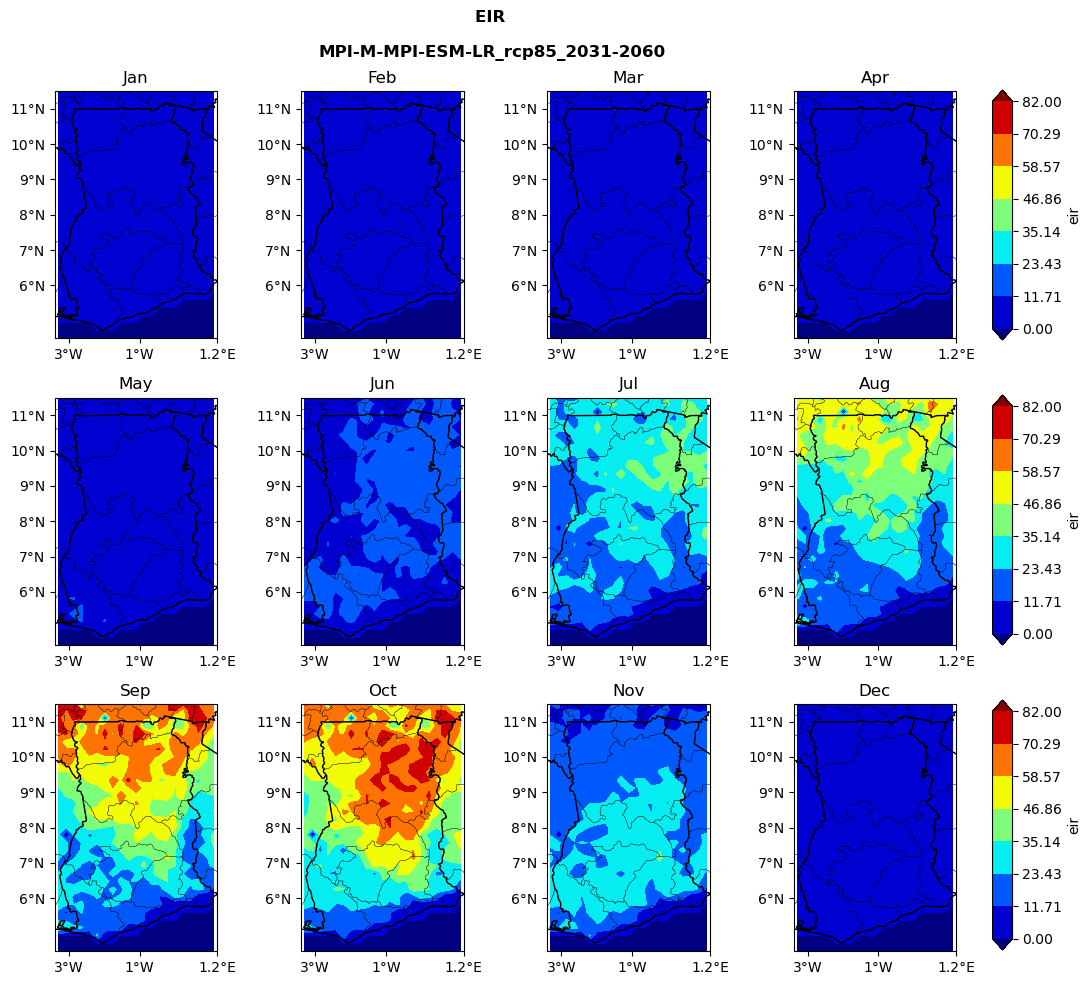

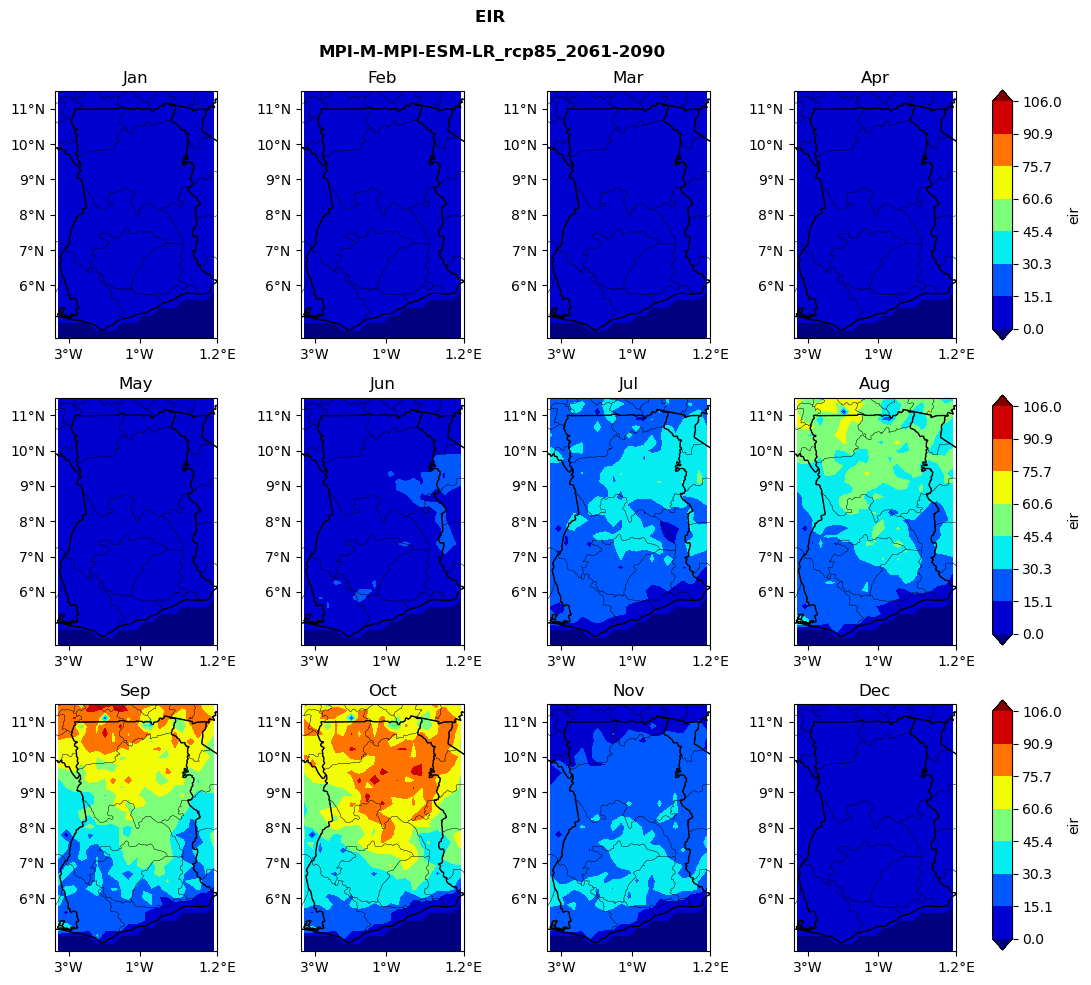

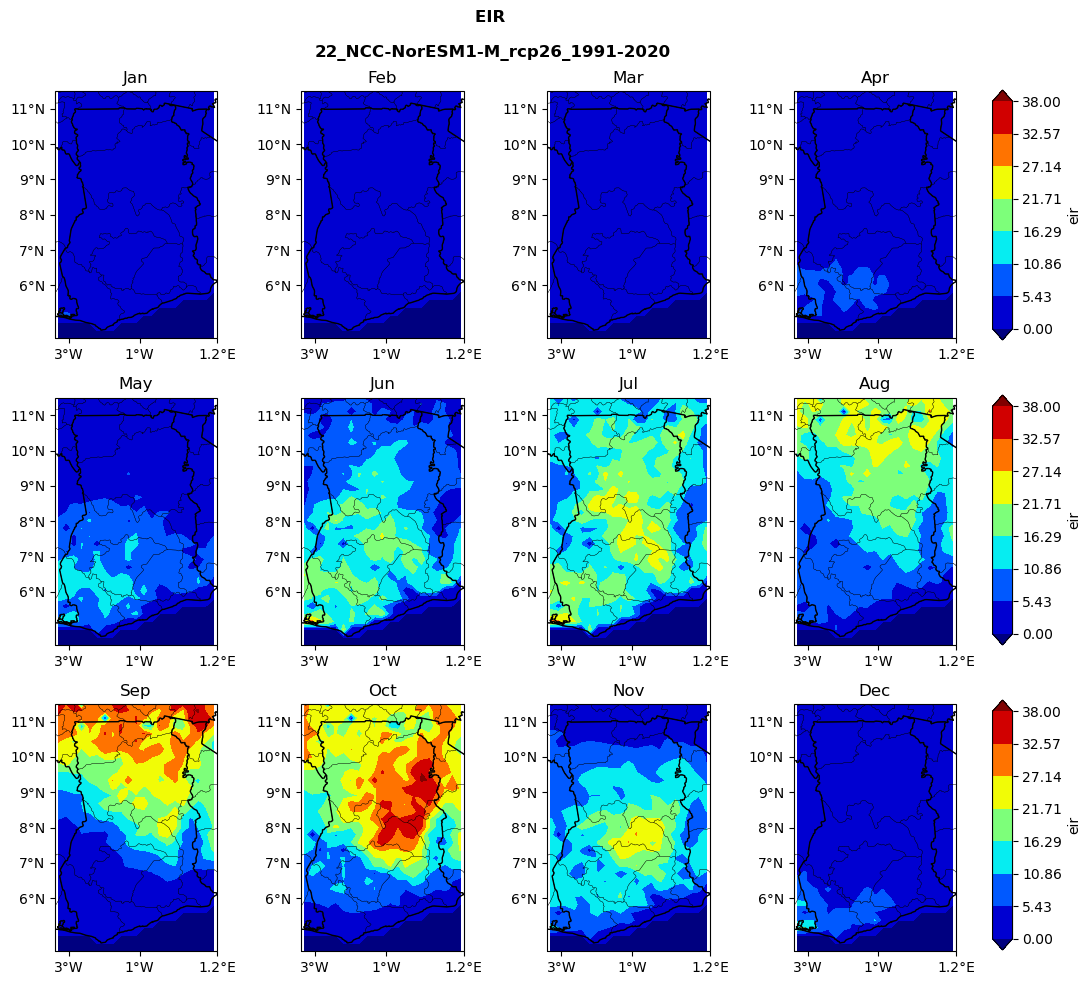

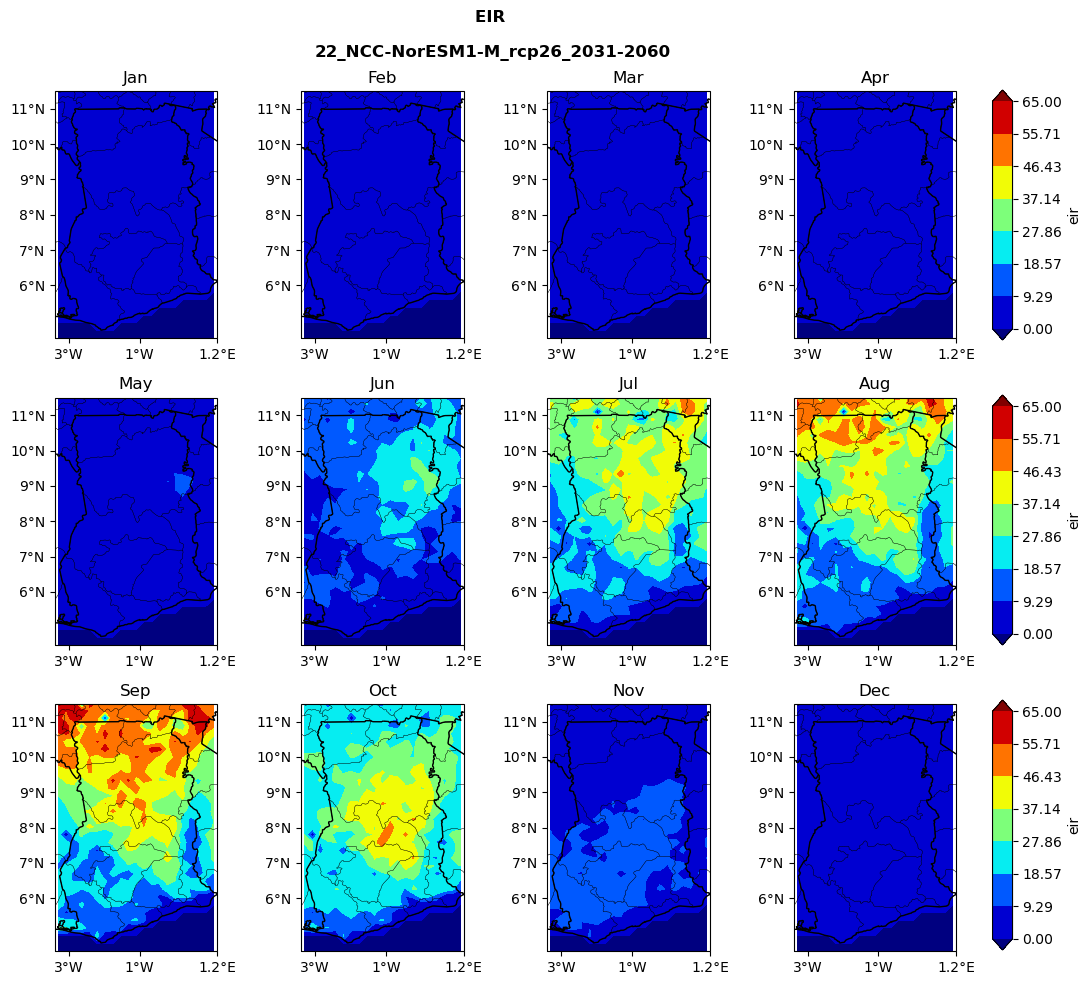

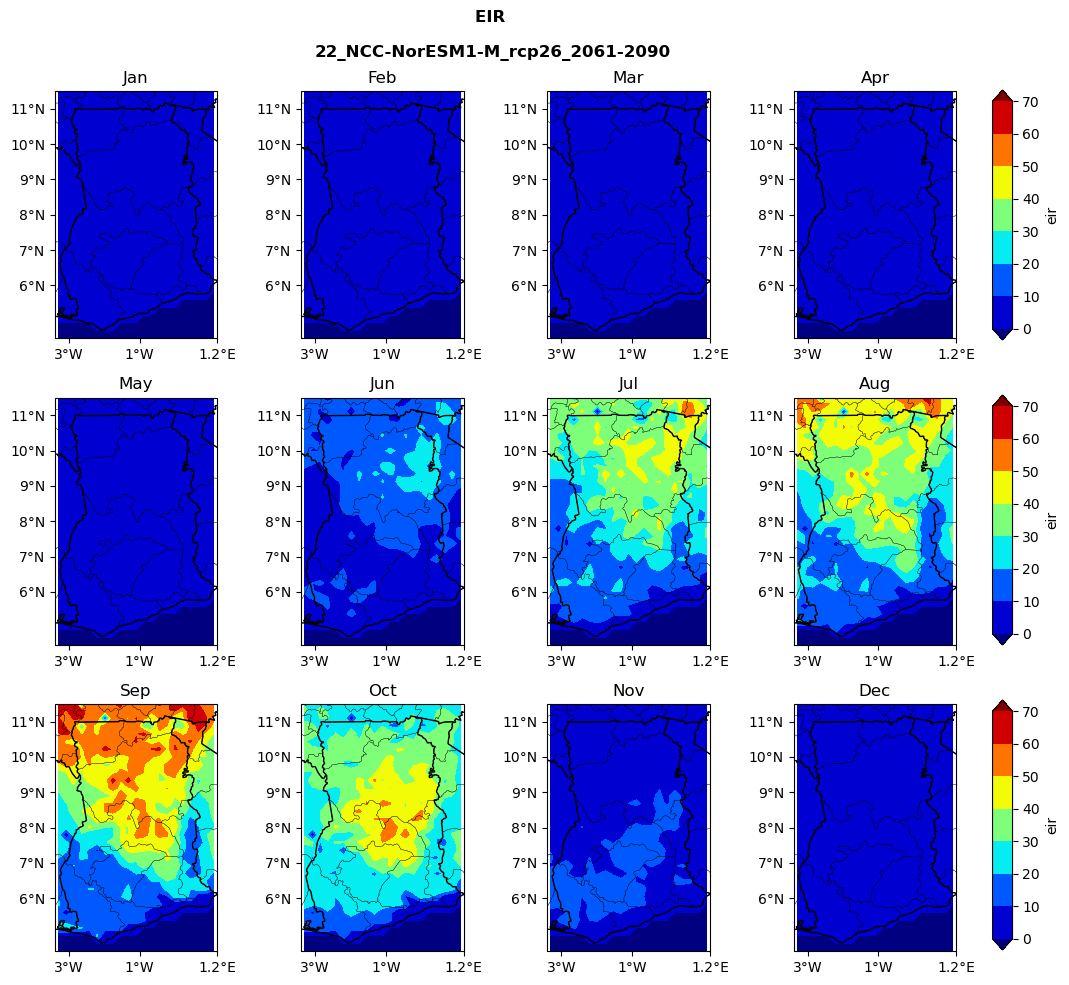

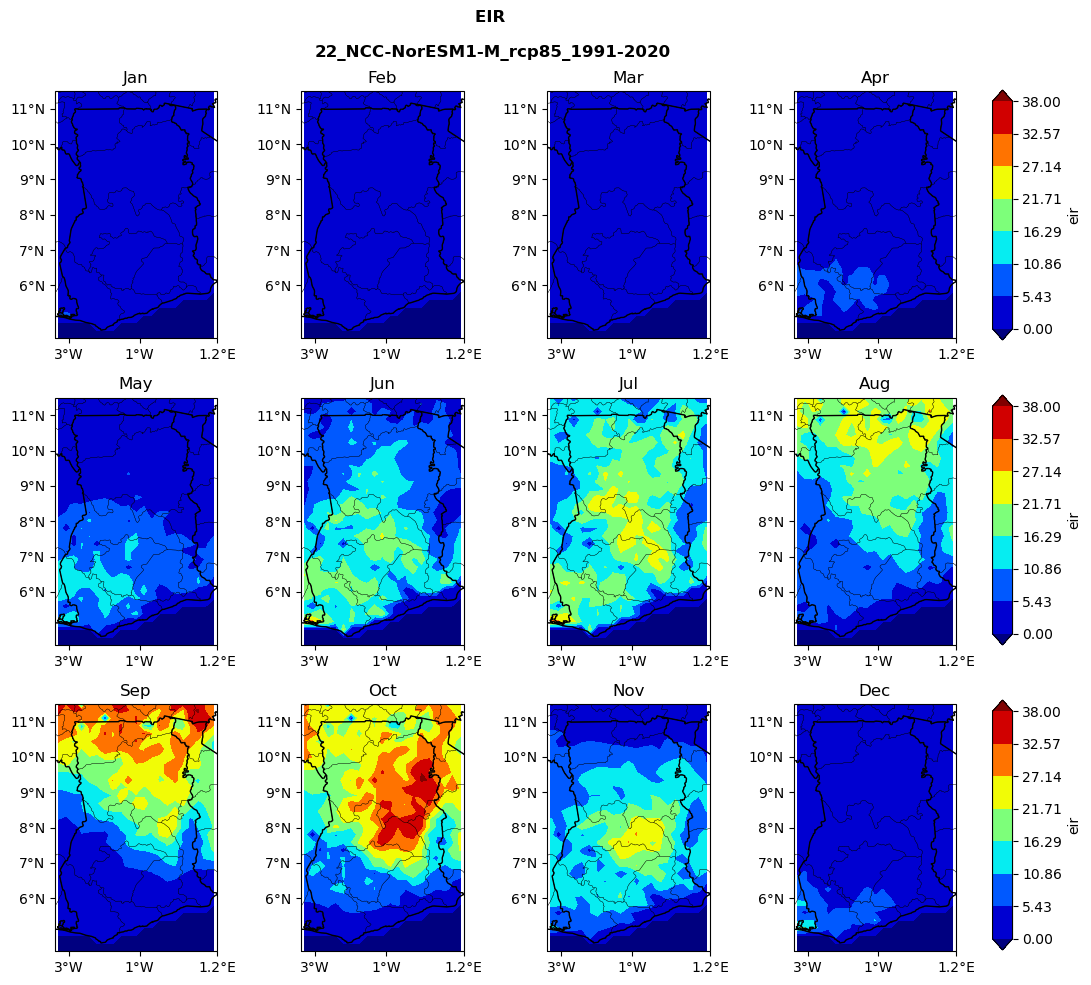

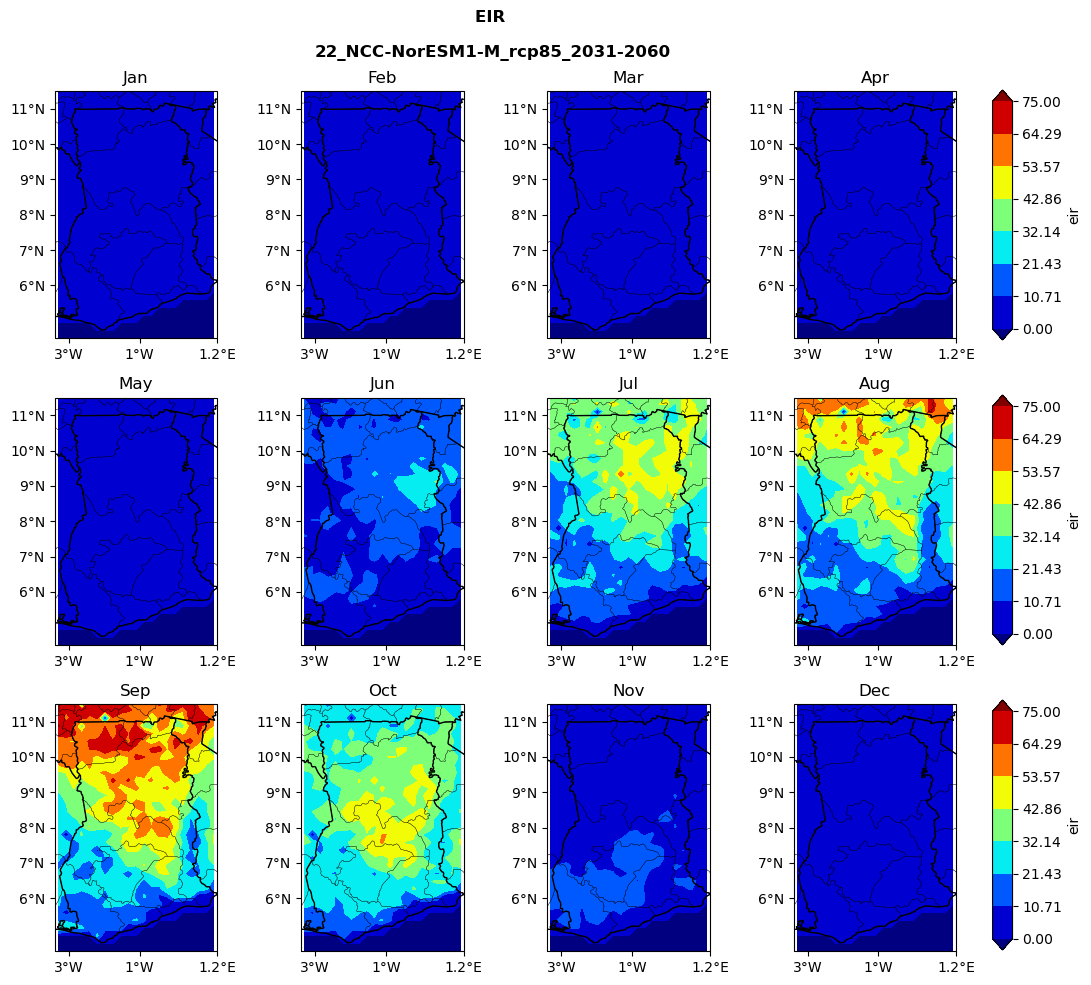

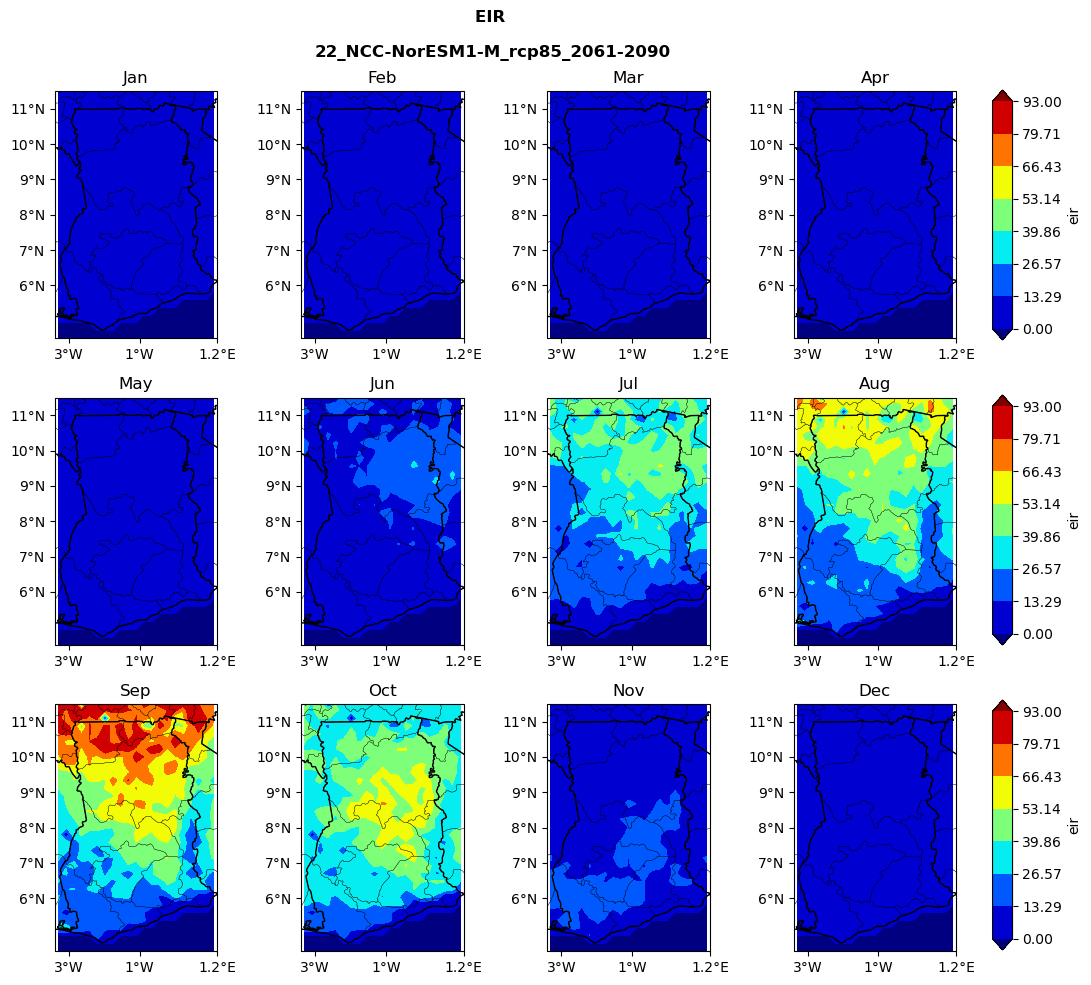

In [100]:
_plt_('eir')

In [ ]:
_plt_('vector')

/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_3499/62575.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(

In [ ]:
_plt_('cases')

/tmp/ipykernel_37532/1762901964.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


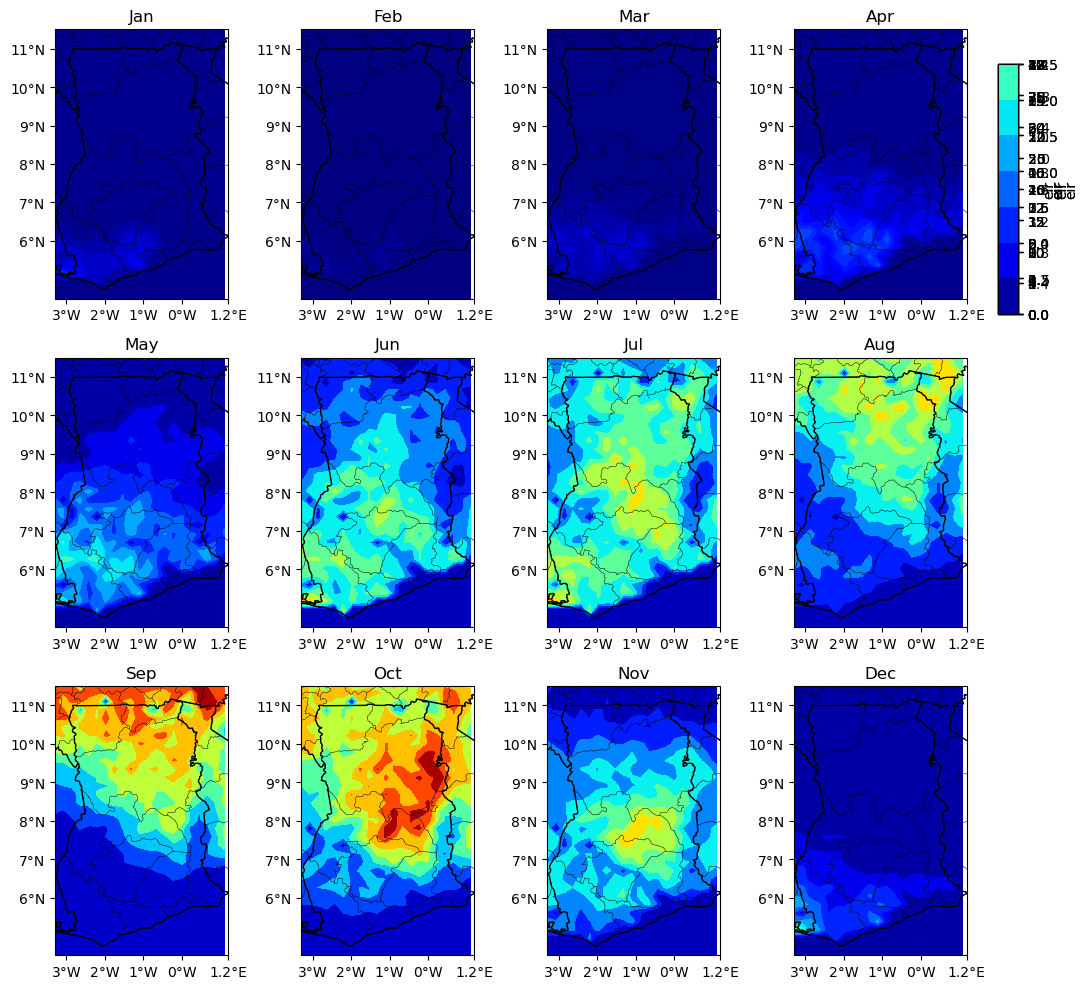

In [ ]:
fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(111, projection = crs.PlateCarree())
axes.set_extent([-20, 40, 0, 25])

countries = ('Benin','Burkina Faso', 'Cameroon','Chad', 'Niger', 
             'Ivory Coast', 'Equatorial Guinea', 'The Gambia', 'Ghana', 
             'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 
             'Nigeria', 'Senegal', 'Sierra Leone', 'Togo')

for record, country in zip(shp.records(), shp.geometries()):
    name = record.attributes['ADMIN']
    if name in countries:
        facecolor = 'forestgreen'
        axes.add_geometries([country], crs.PlateCarree(), 
                          edgecolor='black', facecolor = facecolor, alpha = 0.5)
        axes.text(record.attributes['LABEL_X'] - .05, record.attributes['LABEL_Y'] - .15,
                  name, va='center', ha='center', transform=crs.Geodetic(), fontweight='bold',fontsize = '7')
        axes.plot(record.attributes['LABEL_X'],                            
                record.attributes['LABEL_Y']+ 0.5,'ko', ms=3)#, color='k')
# axes.stock_img()
# axes.add_feature(feature.BORDERS)
# axes.add_feature(feature.LAND)
# axes.add_feature(feature.OCEAN)
# axes.add_feature(feature.COASTLINE)
axes.set_xticks([-20,-10,0,10,20], crs=crs.PlateCarree())
axes.set_yticks([0,5,10,15,20,25], crs=crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)

ax = axes.inset_axes([0.64,0.5,0.5,0.5],projection = crs.PlateCarree())
ax.set_extent([-20, 55, -32, 35])
ax.add_feature(feature.COASTLINE)
ax.add_feature(feature.BORDERS)
ax.add_feature(feature.STATES, linewidth = 0.2)
# ax.set_xticks([-20,0,20,40], crs=crs.PlateCarree())
# ax.set_yticks([-30,-10,10,30], crs=crs.PlateCarree())
ax.stock_img()
ax.gridlines()

kw = dict(resolution='50m', category='cultural',
          name='admin_0_countries')
states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

for record, country in zip(shp.records(), shp.geometries()):
    name = record.attributes['ADMIN']
    if name in countries:
        ax.add_geometries([country], crs.PlateCarree(), edgecolor='black', facecolor = facecolor)
plt.title('A Map of West Africa')
# plt.savefig(path1+'../../figures/west_africa.eps')